In [1]:
import pandas as pd
import numpy as np

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_95bda062811a424cbea637e09f2de124 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='R5uJ6FE0sOpKuL3ftfMBAI-T00wZOMHqd8jcT8LrrLhw',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_95bda062811a424cbea637e09f2de124.get_object(Bucket='myproject-donotdelete-pr-upbogsqjhoqo8p',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
x=df['YearsExperience']

In [7]:
type(x)

pandas.core.series.Series

In [15]:
x=df.iloc[:,0]

In [16]:
x

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [31]:
x=df.iloc[:,0:1].values

In [32]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [33]:
y=df.iloc[:,1:].values

In [34]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [23]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train.shape

(24, 1)

In [37]:
x_test.shape

(6, 1)

In [39]:
from sklearn.linear_model import LinearRegression

In [41]:
model=LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_pred=model.predict(x_test)

In [44]:
y_test


array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.]])

In [45]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [47]:
import matplotlib.pyplot as plt

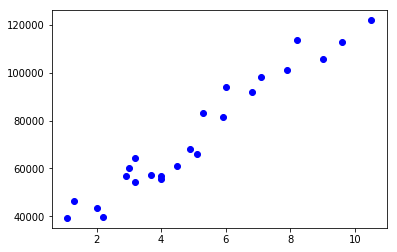

In [49]:
plt.scatter(x_train,y_train,color='blue')

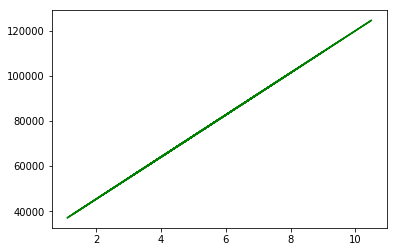

In [52]:
plt.plot(x_train,model.predict(x_train),color='green')

Text(0.5, 1.0, 'Salary Prediction Train Data')

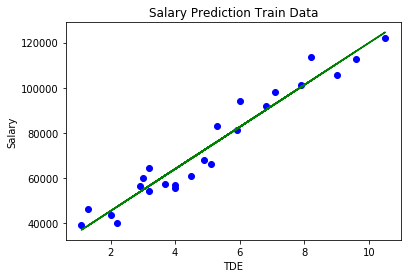

In [56]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,model.predict(x_train),color='green')
plt.xlabel('TDE')
plt.ylabel('Salary')
plt.title('Salary Prediction Train Data')

Text(0.5, 1.0, 'Salary Prediction Train Data')

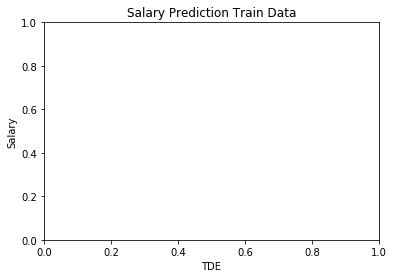